In [1]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!pip install folium

import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# library to handle requests
import requests

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Import done!')

Import done!


In [2]:
from bs4 import BeautifulSoup
import requests
import csv
import json
import xml

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_communities_in_Dubai"
response = requests.get(url).text
soup = BeautifulSoup(response, "html.parser")

In [4]:
table=soup.find('table')
x=table.tbody

In [5]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_communities_in_Dubai')[0]
df.head()

,Community Number,Community (English),Community (Arabic),Area(km2),Population(2000),Population density(/km2)
0,126.0,Abu Hail,أبو هيل,1.27 km²,21414,"16,861.4/km²"
1,711.0,Al Awir 1,العوير الأولى,NaN,NaN,NaN
2,721.0,Al Awir 2,العوير الثانية,NaN,NaN,NaN
3,283.0,Al Ayas,العياص,162.4 km2,1706,162.4/km2
4,333.0,Al Bada'a,البدع,0.82 km²,18816,22946/km²


In [6]:
df.drop(['Community (Arabic)', 'Area(km2)', 'Population(2000)', 'Population density(/km2)'], axis=1, inplace=True)
df.rename(columns={'Community (English)' : 'Community'}, inplace=True)
df.head()

,Community Number,Community
0,126.0,Abu Hail
1,711.0,Al Awir 1
2,721.0,Al Awir 2
3,283.0,Al Ayas
4,333.0,Al Bada'a


In [7]:
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound

address= df['Community'].apply(lambda x: x.split('-')[-1]+', Dubai').unique()
geolocater= Nominatim(user_agent="dubai-explorer")
location=[]
empty=[]

def findcoordinations(add):
    try:
        coordinations= geolocater.geocode(add, timeout=10)
        location.append([add, coordinations.latitude, coordinations.longitude])
        print("the coordinations are {}".format(location[-1]))
    
    except GeocoderTimedOut:
        return getcoords(add)
    
    except:
        empty.append([add])
        print("the coordinations of {} not found".format(empty[-1]))
        
for add in address:
        findcoordinations(add)

the coordinations are ['Abu Hail, Dubai', 25.28594185, 55.32944354478134]
the coordinations are ['Al Awir 1, Dubai', 25.1694203, 55.5416335]
the coordinations are ['Al Awir 2, Dubai', 25.1694203, 55.5416335]
the coordinations are ['Al Ayas, Dubai', 25.2293946, 55.2756788]
the coordinations are ["Al Bada'a, Dubai", 25.224106550000002, 55.26834370791802]
the coordinations are ['Al Baraha, Dubai', 25.281368, 55.319412717201146]
the coordinations are ['Al Barsha 1, Dubai', 25.111504150000002, 55.19718727525046]
the coordinations are ['Al Barsha 2, Dubai', 25.1008572, 55.21627706336069]
the coordinations are ['Al Barsha 3, Dubai', 25.091869600000003, 55.197650116009555]
the coordinations are ['Al Barsha South 1, Dubai', 25.084663399999997, 55.233350431388004]
the coordinations are ['Al Barsha South 2, Dubai', 25.06992845, 55.226623851113]
the coordinations are ['Al Barsha South 3, Dubai', 25.0579623, 55.227981079074]
the coordinations are ['Al Barsha South 4, Dubai', 25.1117235, 55.2064271]

In [8]:
len(location)

77

77 of them have coordinations info.

In [9]:
dubai= pd.DataFrame(location, columns=['Community','Latitude','Longitude'])
dubai.to_csv('dubai_communities_location.csv')
dubai.head()

,Community,Latitude,Longitude
0,"Abu Hail, Dubai",25.285942,55.329444
1,"Al Awir 1, Dubai",25.169420,55.541634
2,"Al Awir 2, Dubai",25.169420,55.541634
3,"Al Ayas, Dubai",25.229395,55.275679
4,"Al Bada'a, Dubai",25.224107,55.268344


In [10]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605'

In [11]:
#lets explore the first community of dubai

dubai.loc[0,'Community']

'Abu Hail, Dubai'

In [12]:
neighborhood_latitude = dubai.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dubai.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = dubai.loc[0, 'Community'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Abu Hail, Dubai are 25.28594185, 55.32944354478134.


In [13]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?&client_id=1Y5EJ4CDW5JJ0ELAPWF1A2GUSFWAQJ2D0JABSJL00E1XUC3B&client_secret=ZX5WRSH2TVYXGIYPFLNUXEUZRITQ3NIQVH3E21RYWPG2PMEK&v=20180605&ll=25.28594185,55.32944354478134&radius=500&limit=100'

In [14]:
results = requests.get(url1).json()
results

{'meta': {'code': 200, 'requestId': '5fa55ccf561497763bd786be'},
 'response': {'headerLocation': 'Deira',
  'headerFullLocation': 'Deira, Dubai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 25.290441854500006,
    'lng': 55.33441110192604},
   'sw': {'lat': 25.281441845499995, 'lng': 55.324475987636646}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f917049e4b0c93d7f58fc4d',
       'name': 'Hamriya Park',
       'location': {'lat': 25.285709645661722,
        'lng': 55.33299999592079,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.285709645661722,
          'lng': 55.33299999592079}],
        'distance': 358,
        'cc': 'AE',
        'city': 'دبي',
        'state': 'دبي',
        'cou

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Hamriya Park,Park,25.285710,55.333000
1,Pond Park - Al Qusais,Park,25.288060,55.332606
2,Lively,Track,25.285194,55.325276
3,Jannati Health Club and Spa,Spa,25.285408,55.325168


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
dubai_venues = getNearbyVenues(names=dubai['Community'],
                                   latitudes=dubai['Latitude'],
                                   longitudes=dubai['Longitude']
                                  )

Abu Hail, Dubai
Al Awir 1, Dubai
Al Awir 2, Dubai
Al Ayas, Dubai
Al Bada'a, Dubai
Al Baraha, Dubai
Al Barsha 1, Dubai
Al Barsha 2, Dubai
Al Barsha 3, Dubai
Al Barsha South 1, Dubai
Al Barsha South 2, Dubai
Al Barsha South 3, Dubai
Al Barsha South 4, Dubai
Al Barsha South 5, Dubai
Al Buteen, Dubai
Al Garhoud, Dubai
Al Hamriya, Dubai, Dubai
Al Hudaiba, Dubai
Al Jaddaf, Dubai
Al Jafiliya, Dubai
Al Karama, Dubai
Al Kifaf, Dubai
Al Mamzar, Dubai
Al Manara, Dubai
Al Mankhool, Dubai
Al Mina, Dubai
Al Muraqqabat, Dubai
Al Murar, Dubai
Al Mushrif, Dubai
Al Muteena, Dubai
Al Quoz First, Dubai
Al Qusais First, Dubai
Al Qusais Industrial Fifth, Dubai
Al Qusais Industrial First, Dubai
Al Qusais Industrial Fourth, Dubai
Al Qusais Industrial Second, Dubai
Al Qusais Industrial Third, Dubai
Al Qusais Second, Dubai
Al Qusais Third, Dubai
Al Raffa, Dubai
Al Ras, Dubai
Al Rashidiya, Dubai
Al Rigga, Dubai
Al Sabkha, Dubai
Al Satwa, Dubai
Al Shindagha, Dubai
Al Wasl, Dubai
Ayal Nasir, Dubai
Business Bay, Du

In [20]:
print(dubai_venues.shape)
dubai_venues.head()

(1504, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Abu Hail, Dubai",25.285942,55.329444,Hamriya Park,25.285710,55.333000,Park
1,"Abu Hail, Dubai",25.285942,55.329444,Pond Park - Al Qusais,25.288060,55.332606,Park
2,"Abu Hail, Dubai",25.285942,55.329444,Lively,25.285194,55.325276,Track
3,"Abu Hail, Dubai",25.285942,55.329444,Jannati Health Club and Spa,25.285408,55.325168,Spa
4,"Al Ayas, Dubai",25.229395,55.275679,Regal,25.231710,55.276337,Women's Store


In [21]:
dubai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Abu Hail, Dubai",4,4,4,4,4,4
"Al Ayas, Dubai",12,12,12,12,12,12
"Al Bada'a, Dubai",6,6,6,6,6,6
"Al Baraha, Dubai",11,11,11,11,11,11
"Al Barsha 1, Dubai",34,34,34,34,34,34
...,...,...,...,...,...,...
"Umm Al Sheif, Dubai",1,1,1,1,1,1
"Umm Ramool, Dubai",3,3,3,3,3,3
"Wadi Alamardi, Dubai",1,1,1,1,1,1


In [22]:
print('There are {} uniques categories.'.format(len(dubai_venues['Venue Category'].unique())))

There are 217 uniques categories.


In [23]:
# one hot encoding
dubai_onehot = pd.get_dummies(dubai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dubai_onehot['Neighborhood'] = dubai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dubai_onehot.columns[-1]] + list(dubai_onehot.columns[:-1])
dubai_onehot = dubai_onehot[fixed_columns]

dubai_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Waterfront,Women's Store,Yemeni Restaurant,Yoga Studio
0,"Abu Hail, Dubai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Abu Hail, Dubai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Abu Hail, Dubai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Abu Hail, Dubai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Al Ayas, Dubai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
dubai_onehot.shape

(1504, 218)

In [25]:
dubai_grouped = dubai_onehot.groupby('Neighborhood').mean().reset_index()
dubai_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Waterfront,Women's Store,Yemeni Restaurant,Yoga Studio
0,"Abu Hail, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Al Ayas, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0
2,"Al Bada'a, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,"Al Baraha, Dubai",0.00,0.0,0.0,0.090909,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,"Al Barsha 1, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,"Umm Al Sheif, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
68,"Umm Ramool, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
69,"Wadi Alamardi, Dubai",0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
70,"Za'abeel First, Dubai",0.01,0.0,0.0,0.020000,0.0,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.0


In [26]:
dubai_grouped.shape

(72, 218)

In [27]:
num_top_venues = 5

for hood in dubai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dubai_grouped[dubai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abu Hail, Dubai----
                venue  freq
0                Park  0.50
1                 Spa  0.25
2               Track  0.25
3   Accessories Store  0.00
4  Persian Restaurant  0.00


----Al Ayas, Dubai----
                 venue  freq
0    Electronics Store  0.25
1        Grocery Store  0.17
2    Indian Restaurant  0.08
3        Women's Store  0.08
4  Japanese Restaurant  0.08


----Al Bada'a, Dubai----
                       venue  freq
0                       Park  0.33
1  Middle Eastern Restaurant  0.17
2                       Café  0.17
3                       Pool  0.17
4                Tailor Shop  0.17


----Al Baraha, Dubai----
                       venue  freq
0                      Hotel  0.18
1  Middle Eastern Restaurant  0.18
2          Convenience Store  0.09
3          Mobile Phone Shop  0.09
4                        Spa  0.09


----Al Barsha 1, Dubai----
             venue  freq
0            Hotel  0.26
1   Breakfast Spot  0.06
2  Bed & Breakfast  0.06
3     

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dubai_grouped['Neighborhood']

for ind in np.arange(dubai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dubai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abu Hail, Dubai",Park,Spa,Track,Food,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant
1,"Al Ayas, Dubai",Electronics Store,Grocery Store,Indian Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Asian Restaurant,Restaurant,Japanese Restaurant,Women's Store,Fried Chicken Joint
2,"Al Bada'a, Dubai",Park,Pool,Café,Tailor Shop,Middle Eastern Restaurant,Yoga Studio,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint
3,"Al Baraha, Dubai",Middle Eastern Restaurant,Hotel,Coffee Shop,Convenience Store,Mobile Phone Shop,Lounge,Spa,Café,American Restaurant,Furniture / Home Store
4,"Al Barsha 1, Dubai",Hotel,Breakfast Spot,Restaurant,Bed & Breakfast,Bakery,Egyptian Restaurant,Convenience Store,Shawarma Place,Coffee Shop,Sandwich Place


In [30]:
most_common=neighborhoods_venues_sorted.iloc[:,:2]
most_common

,Neighborhood,1st Most Common Venue
0,"Abu Hail, Dubai",Park
1,"Al Ayas, Dubai",Electronics Store
2,"Al Bada'a, Dubai",Park
3,"Al Baraha, Dubai",Middle Eastern Restaurant
4,"Al Barsha 1, Dubai",Hotel
...,...,...
67,"Umm Al Sheif, Dubai",French Restaurant
68,"Umm Ramool, Dubai",Auto Garage
69,"Wadi Alamardi, Dubai",Campground
70,"Za'abeel First, Dubai",Coffee Shop


In [31]:
df_restaurant = most_common[most_common['1st Most Common Venue'].str.contains('Restaurant')].reset_index(drop=True)
df_restaurant

,Neighborhood,1st Most Common Venue
0,"Al Baraha, Dubai",Middle Eastern Restaurant
1,"Al Hudaiba, Dubai",Asian Restaurant
2,"Al Jaddaf, Dubai",Seafood Restaurant
3,"Al Karama, Dubai",Indian Restaurant
4,"Al Mamzar, Dubai",Restaurant
5,"Al Mina, Dubai",Mexican Restaurant
6,"Al Muraqqabat, Dubai",Middle Eastern Restaurant
7,"Al Muteena, Dubai",Chinese Restaurant
8,"Al Qusais Industrial Fifth, Dubai",Fast Food Restaurant
9,"Al Rigga, Dubai",Restaurant


In [32]:
df_park = most_common[most_common['1st Most Common Venue'].str.contains('Park')].reset_index(drop=True)
df_park

,Neighborhood,1st Most Common Venue
0,"Abu Hail, Dubai",Park
1,"Al Bada'a, Dubai",Park


In [33]:
df_pub = most_common[most_common['1st Most Common Venue'].str.contains('Pub')].reset_index(drop=True)
df_pub

,Neighborhood,1st Most Common Venue
0,"Al Qusais Second, Dubai",Pub
1,"Za'abeel Second, Dubai",Pub


In [34]:
df_gym = most_common[most_common['1st Most Common Venue'].str.contains('Gym')].reset_index(drop=True)
df_gym

,Neighborhood,1st Most Common Venue
0,"Al Quoz First, Dubai",Gym / Fitness Center


In [35]:
df_coffee = most_common[most_common['1st Most Common Venue'].str.contains('Coffee Shop')].reset_index(drop=True)
df_coffee

,Neighborhood,1st Most Common Venue
0,"Al Barsha South 2, Dubai",Coffee Shop
1,"Al Jafiliya, Dubai",Coffee Shop
2,"Al Qusais First, Dubai",Coffee Shop
3,"Al Satwa, Dubai",Coffee Shop
4,"Emirates Hill Third, Dubai",Coffee Shop
5,"Mirdif, Dubai",Coffee Shop
6,"Ras Al Khor, Dubai",Coffee Shop
7,"Rigga Al Buteen, Dubai",Coffee Shop
8,"Za'abeel First, Dubai",Coffee Shop


In [36]:
df_beach = most_common[most_common['1st Most Common Venue'].str.contains('Beach')].reset_index(drop=True)
df_beach

,Neighborhood,1st Most Common Venue
0,"Palm Jumeira, Dubai",Beach


In [37]:
venues = results['response']['groups'][0]['items']
    
df_Marina = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Marina = df_Marina.loc[:, filtered_columns]

# filter the category for each row
df_Marina['venue.categories'] = df_Marina.apply(get_category_type, axis=1)

# clean columns

df_Marina.columns = [col.split(".")[-1] for col in df_Marina.columns]
df_Marina.insert(0, 'neighborhood', 'Dubai Marina')

print('{} venues were returned by Foursquare.'.format(df.shape[0]))
df_Marina.head()

135 venues were returned by Foursquare.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,neighborhood,name,categories,lat,lng
0,Dubai Marina,Hamriya Park,Park,25.285710,55.333000
1,Dubai Marina,Pond Park - Al Qusais,Park,25.288060,55.332606
2,Dubai Marina,Lively,Track,25.285194,55.325276
3,Dubai Marina,Jannati Health Club and Spa,Spa,25.285408,55.325168


In [38]:
venues = results['response']['groups'][0]['items']
    
df_down = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_down = df_down.loc[:, filtered_columns]

# filter the category for each row
df_down['venue.categories'] = df_down.apply(get_category_type, axis=1)

# clean columns

df_down.columns = [col.split(".")[-1] for col in df_down.columns]
df_down.insert(0, 'neighborhood', 'Downtown')

print('{} venues were returned by Foursquare.'.format(df.shape[0]))
df_down.head()

135 venues were returned by Foursquare.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,neighborhood,name,categories,lat,lng
0,Downtown,Hamriya Park,Park,25.285710,55.333000
1,Downtown,Pond Park - Al Qusais,Park,25.288060,55.332606
2,Downtown,Lively,Track,25.285194,55.325276
3,Downtown,Jannati Health Club and Spa,Spa,25.285408,55.325168


In [39]:
dubai_data=dubai
dubai_data.rename(columns={'Community':'Neighborhood'}, inplace=True)
dubai_data

,Neighborhood,Latitude,Longitude
0,"Abu Hail, Dubai",25.285942,55.329444
1,"Al Awir 1, Dubai",25.169420,55.541634
2,"Al Awir 2, Dubai",25.169420,55.541634
3,"Al Ayas, Dubai",25.229395,55.275679
4,"Al Bada'a, Dubai",25.224107,55.268344
...,...,...,...
72,"Umm Al Sheif, Dubai",25.132752,55.205857
73,"Umm Ramool, Dubai",25.229996,55.365626
74,"Wadi Alamardi, Dubai",25.195744,55.494357
75,"Za'abeel First, Dubai",25.198440,55.279939


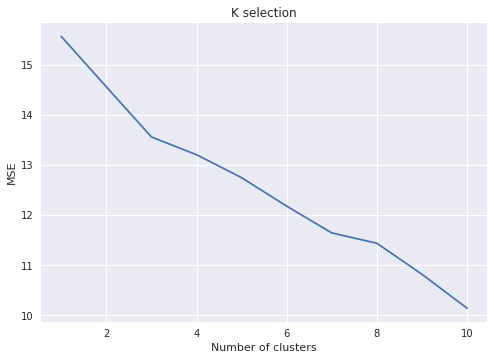

In [40]:
plt.style.use("seaborn")
Ks = 11
mse = np.zeros((Ks-1))
dubai_grouped_clustering = dubai_grouped.drop(['Neighborhood'], 1)
for n in range(1,Ks):
    
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(dubai_grouped_clustering)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

According to the elbow method, 7 clusters are enough for finding similarities!

In [41]:
kclusters = 7

dubai_grouped_clustering = dubai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dubai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 5, 5, 1, 1, 0, 1, 5, 5, 5, 5, 5, 5, 1, 0, 5, 1, 5, 1, 5,
       5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 5, 5, 0, 1, 1,
       5, 5, 5, 1, 1, 1, 0, 1, 1, 1, 1, 1, 5, 4, 1, 1, 5, 5, 1, 5, 0, 1,
       5, 2, 1, 6, 1, 1], dtype=int32)

In [42]:
dubai_merged = dubai_data

#merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dubai_merged = dubai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dubai_merged.head() # check the last columns!


,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abu Hail, Dubai",25.285942,55.329444,Park,Spa,Track,Food,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant
1,"Al Awir 1, Dubai",25.169420,55.541634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Al Awir 2, Dubai",25.169420,55.541634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Al Ayas, Dubai",25.229395,55.275679,Electronics Store,Grocery Store,Indian Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Asian Restaurant,Restaurant,Japanese Restaurant,Women's Store,Fried Chicken Joint
4,"Al Bada'a, Dubai",25.224107,55.268344,Park,Pool,Café,Tailor Shop,Middle Eastern Restaurant,Yoga Studio,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint


In [45]:
dubai_merged.dropna(inplace=True)

dubai_merged.head()

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abu Hail, Dubai",25.285942,55.329444,Park,Spa,Track,Food,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant
3,"Al Ayas, Dubai",25.229395,55.275679,Electronics Store,Grocery Store,Indian Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Asian Restaurant,Restaurant,Japanese Restaurant,Women's Store,Fried Chicken Joint
4,"Al Bada'a, Dubai",25.224107,55.268344,Park,Pool,Café,Tailor Shop,Middle Eastern Restaurant,Yoga Studio,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint
5,"Al Baraha, Dubai",25.281368,55.319413,Middle Eastern Restaurant,Hotel,Coffee Shop,Convenience Store,Mobile Phone Shop,Lounge,Spa,Café,American Restaurant,Furniture / Home Store
6,"Al Barsha 1, Dubai",25.111504,55.197187,Hotel,Breakfast Spot,Restaurant,Bed & Breakfast,Bakery,Egyptian Restaurant,Convenience Store,Shawarma Place,Coffee Shop,Sandwich Place


In [49]:
dubai_merged['Cluster Labels']=kmeans.labels_

In [50]:
dubai_merged.head()

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,"Abu Hail, Dubai",25.285942,55.329444,Park,Spa,Track,Food,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,1
3,"Al Ayas, Dubai",25.229395,55.275679,Electronics Store,Grocery Store,Indian Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Asian Restaurant,Restaurant,Japanese Restaurant,Women's Store,Fried Chicken Joint,1
4,"Al Bada'a, Dubai",25.224107,55.268344,Park,Pool,Café,Tailor Shop,Middle Eastern Restaurant,Yoga Studio,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,1
5,"Al Baraha, Dubai",25.281368,55.319413,Middle Eastern Restaurant,Hotel,Coffee Shop,Convenience Store,Mobile Phone Shop,Lounge,Spa,Café,American Restaurant,Furniture / Home Store,5
6,"Al Barsha 1, Dubai",25.111504,55.197187,Hotel,Breakfast Spot,Restaurant,Bed & Breakfast,Bakery,Egyptian Restaurant,Convenience Store,Shawarma Place,Coffee Shop,Sandwich Place,5


you can see cluster labels at the right end of the table.

In [51]:
dubai_merged.dtypes

Neighborhood               object
Latitude                  float64
Longitude                 float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
Cluster Labels              int32
dtype: object

In [52]:
#defining the latitude and longitude of City/place whose map is to be created
address = 'Dubai'

geolocator = Nominatim(user_agent="dubai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dubai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dubai are 25.0750095, 55.18876088183319.


In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dubai_merged['Latitude'], dubai_merged['Longitude'], dubai_merged['Neighborhood'], dubai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Lets examine the clusters.

In [66]:
c0=dubai_merged.loc[dubai_merged['Cluster Labels'] == 0, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c0


,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
10,25.069928,"Al Barsha South 2, Dubai",25.069928,55.226624,Coffee Shop,Pharmacy,Bakery,Food & Drink Shop,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,0
19,25.233360,"Al Jafiliya, Dubai",25.233360,55.292050,Coffee Shop,Metro Station,Fast Food Restaurant,Track,Sandwich Place,Yoga Studio,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,0
44,25.221161,"Al Satwa, Dubai",25.221161,55.273836,Coffee Shop,Cosmetics Shop,Yoga Studio,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Fountain,0
53,24.799096,"Hatta, Dubai",24.799096,56.114941,Soccer Field,Historic Site,Yoga Studio,Gift Shop,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,0
68,25.189575,"Ras Al Khor, Dubai",25.189575,55.363884,Coffee Shop,Photography Studio,Yoga Studio,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Fountain,0


In [67]:
c1=dubai_merged.loc[dubai_merged['Cluster Labels'] == 1, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c1

,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,25.285942,"Abu Hail, Dubai",25.285942,55.329444,Park,Spa,Track,Food,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,1
3,25.229395,"Al Ayas, Dubai",25.229395,55.275679,Electronics Store,Grocery Store,Indian Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Asian Restaurant,Restaurant,Japanese Restaurant,Women's Store,Fried Chicken Joint,1
4,25.224107,"Al Bada'a, Dubai",25.224107,55.268344,Park,Pool,Café,Tailor Shop,Middle Eastern Restaurant,Yoga Studio,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,1
7,25.100857,"Al Barsha 2, Dubai",25.100857,55.216277,Jewelry Store,Coffee Shop,Bookstore,Grocery Store,Park,Bakery,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,1
8,25.091870,"Al Barsha 3, Dubai",25.091870,55.197650,Bookstore,Athletics & Sports,Food Court,Yoga Studio,Food & Drink Shop,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,1
11,25.057962,"Al Barsha South 3, Dubai",25.057962,55.227981,Supermarket,Yoga Studio,Gluten-free Restaurant,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,1
18,-19.848297,"Al Jaddaf, Dubai",-19.848297,-44.035042,Seafood Restaurant,Pizza Place,Grocery Store,Food Truck,Flower Shop,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,1
21,25.227887,"Al Kifaf, Dubai",25.227887,55.274809,Electronics Store,Grocery Store,Tailor Shop,Women's Store,Middle Eastern Restaurant,Japanese Restaurant,Café,Indian Restaurant,BBQ Joint,Restaurant,1
23,25.143712,"Al Manara, Dubai",25.143712,55.213574,Café,Playground,Gym,Ice Cream Shop,Yoga Studio,Food,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,1
30,25.150002,"Al Quoz First, Dubai",25.150002,55.233615,Gym / Fitness Center,Bookstore,Veterinarian,Yoga Studio,Food & Drink Shop,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,1


In [68]:
c2=dubai_merged.loc[dubai_merged['Cluster Labels'] == 2, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c2

,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
72,25.132752,"Umm Al Sheif, Dubai",25.132752,55.205857,French Restaurant,Yoga Studio,Food,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,Fountain,2


In [69]:
c3=dubai_merged.loc[dubai_merged['Cluster Labels'] == 3, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c3

,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
35,14.670905,"Al Qusais Industrial Second, Dubai",14.670905,121.014908,Warehouse Store,Yoga Studio,Food,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,3


In [70]:
c4=dubai_merged.loc[dubai_merged['Cluster Labels'] == 4, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c4

,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
61,25.306377,"Jumeira Second, Dubai",25.306377,55.389131,Department Store,Yoga Studio,Food,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,4


In [71]:
c5=dubai_merged.loc[dubai_merged['Cluster Labels'] == 5, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c5

,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
5,25.281368,"Al Baraha, Dubai",25.281368,55.319413,Middle Eastern Restaurant,Hotel,Coffee Shop,Convenience Store,Mobile Phone Shop,Lounge,Spa,Café,American Restaurant,Furniture / Home Store,5
6,25.111504,"Al Barsha 1, Dubai",25.111504,55.197187,Hotel,Breakfast Spot,Restaurant,Bed & Breakfast,Bakery,Egyptian Restaurant,Convenience Store,Shawarma Place,Coffee Shop,Sandwich Place,5
12,25.111724,"Al Barsha South 4, Dubai",25.111724,55.206427,Hotel,Indian Restaurant,Bed & Breakfast,Middle Eastern Restaurant,Ice Cream Shop,Fried Chicken Joint,Restaurant,Chinese Restaurant,Café,Gaming Cafe,5
13,25.111724,"Al Barsha South 5, Dubai",25.111724,55.206427,Hotel,Indian Restaurant,Bed & Breakfast,Middle Eastern Restaurant,Ice Cream Shop,Fried Chicken Joint,Restaurant,Chinese Restaurant,Café,Gaming Cafe,5
14,25.263057,"Al Buteen, Dubai",25.263057,55.320584,Hotel,Middle Eastern Restaurant,Ice Cream Shop,Juice Bar,Restaurant,Fried Chicken Joint,Café,Clothing Store,Breakfast Spot,Pizza Place,5
15,25.239831,"Al Garhoud, Dubai",25.239831,55.355668,Post Office,Hotel,Dessert Shop,Restaurant,Coffee Shop,Shipping Store,Café,Bar,Gastropub,Hotel Pool,5
16,25.260774,"Al Hamriya, Dubai, Dubai",25.260774,55.304996,Plaza,Hotel,Coffee Shop,Middle Eastern Restaurant,Restaurant,Lebanese Restaurant,Burger Joint,Shopping Mall,Science Museum,Furniture / Home Store,5
17,25.240050,"Al Hudaiba, Dubai",25.240050,55.277459,Asian Restaurant,Hotel,Middle Eastern Restaurant,Café,Convenience Store,Smoke Shop,Bar,Supermarket,Dessert Shop,Chinese Restaurant,5
20,25.244403,"Al Karama, Dubai",25.244403,55.304755,Indian Restaurant,Asian Restaurant,Bakery,South Indian Restaurant,Chinese Restaurant,Grocery Store,Middle Eastern Restaurant,Pakistani Restaurant,Convenience Store,Cafeteria,5
22,25.303247,"Al Mamzar, Dubai",25.303247,55.343453,Restaurant,Athletics & Sports,Yoga Studio,Food,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,5


In [72]:
c6=dubai_merged.loc[dubai_merged['Cluster Labels'] == 6, dubai_merged.columns[[1] + list(range(0, dubai_merged.shape[1]))]]
c6

,Latitude,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
74,25.195744,"Wadi Alamardi, Dubai",25.195744,55.494357,Campground,Yoga Studio,Food & Drink Shop,Gastropub,Gas Station,Garden,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,6


In [73]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    #print(values_cumsum)

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        #color_val = colormap((float(values_cumsum[i])/total_values))
        color_val = colormap(np.linspace(0,1,5)[i])
        #print(np.arange(1,6)[i]/5)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Cluster 0: 28
Cluster 1: 200
Cluster 2: 6
Cluster 3: 6
Cluster 4: 6
Cluster 5: 150
Cluster 6: 6


NameError: name 'mpatches' is not defined

<Figure size 576x396 with 0 Axes>

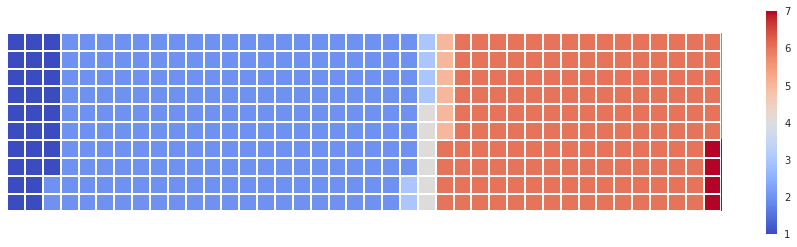

In [74]:
index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6']
portions = [c0.shape[0], c1.shape[0], c2.shape[0], c3.shape[0], c4.shape[0], c5.shape[0], c6.shape[0]]
width = 40 # width of chart
height = 10 # height of chart

categories = index # categories
values = portions # correponding values of categories

colormap = plt.cm.coolwarm# color map class
create_waffle_chart(categories, values, height, width, colormap)

In [75]:
tmp = np.zeros((kmeans.cluster_centers_.shape))
tmp[0,:] = kmeans.cluster_centers_[0,:]
tmp[1,:] = kmeans.cluster_centers_[1,:]
tmp[2,:] = kmeans.cluster_centers_[2,:]
tmp[3,:] = kmeans.cluster_centers_[3,:]
tmp[4,:] = kmeans.cluster_centers_[4,:]
tmp[5,:] = kmeans.cluster_centers_[5,:]
tmp[6,:] = kmeans.cluster_centers_[6,:]
maxi = []
for i in range(7):
    maxi.extend(tmp[i,:].argsort()[-3:][::-1])
    
args = np.asarray(list(set(maxi)))
table1 = pd.DataFrame(data = tmp[:,args.astype(int)], index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6'], columns = dubai_grouped_clustering.columns[args.astype(int)])
table1 = table1.transpose()

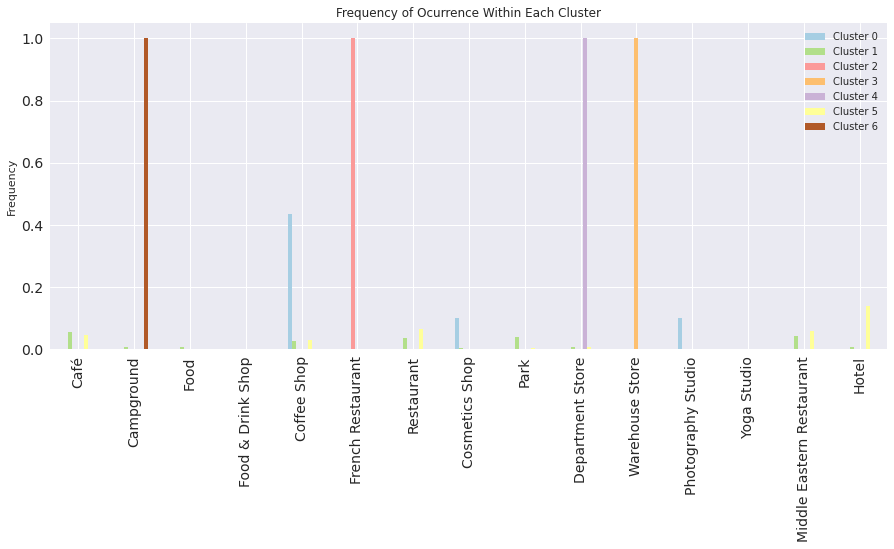

In [77]:
plt.style.use('seaborn')
ax = table1.plot(kind='bar', figsize=(15,6), rot=90, fontsize = 14, colormap = 'Paired')
bars = ax.get_children()
plt.title("Frequency of Ocurrence Within Each Cluster")
plt.ylabel("Frequency")

plt.show()

lets see without campground, french restaurant, department and warehouse stores.

In [78]:
maxi = []
for i in range(7):
    maxi.extend(tmp[i,:].argsort()[-3:][::-1])
    
args = np.asarray(list(set(maxi)))
table1 = pd.DataFrame(data = tmp[:,args.astype(int)], index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6'], columns = dubai_grouped_clustering.columns[args.astype(int)])
table1 = table1.T
table1.drop(["Campground","French Restaurant", "Department Store", "Warehouse Store"], inplace= True)

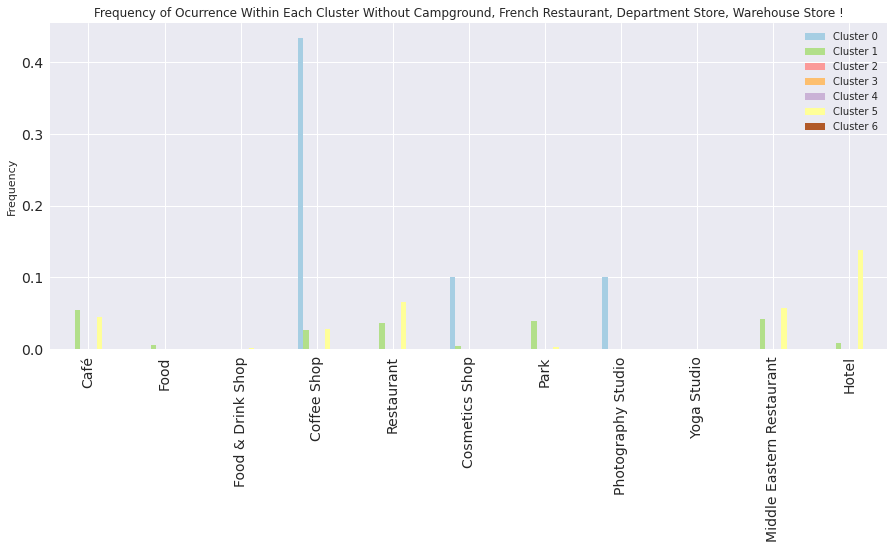

In [80]:
plt.style.use('seaborn')
ax = table1.plot(kind='bar', figsize=(15,6), rot=90, fontsize = 14, colormap = "Paired")
bars = ax.get_children()
plt.title("Frequency of Ocurrence Within Each Cluster Without Campground, French Restaurant, Department Store, Warehouse Store !")
plt.ylabel("Frequency")
plt.show()

In [82]:

word_string = ""
for neighborhood in dubai_merged["Neighborhood"]:
    elements = ""
    for element in neighborhood.split(","):
        elements += element.strip().replace(" ", "") + " "
    word_string += elements+" "
word_string = word_string.replace(".","")

tmp = c0["Neighborhood"].tolist()
c0_list = []
for element in tmp:
    c0_list.extend(element.split(", "))
c0_list = [element.replace(" ","") for element in c0_list]

tmp = c1["Neighborhood"].tolist()
c1_list = []
for element in tmp:
    c1_list.extend(element.split(", "))
c1_list = [element.replace(" ","") for element in c1_list]
    
tmp = c2["Neighborhood"].tolist()
c2_list = []
for element in tmp:
    c2_list.extend(element.split(", "))
c2_list = [element.replace(" ","") for element in c2_list]

tmp = c3["Neighborhood"].tolist()
c3_list = []
for element in tmp:
    c3_list.extend(element.split(", "))
c3_list = [element.replace(" ","") for element in c3_list]    

tmp = c4["Neighborhood"].tolist()
c4_list = []
for element in tmp:
    c4_list.extend(element.split(", "))
c4_list = [element.replace(" ","") for element in c4_list]

tmp = c5["Neighborhood"].tolist()
c5_list = []
for element in tmp:
    c5_list.extend(element.split(", "))
c5_list = [element.replace(" ","") for element in c5_list]

tmp = c6["Neighborhood"].tolist()
c6_list = []
for element in tmp:
    c6_list.extend(element.split(", "))
c6_list = [element.replace(" ","") for element in c6_list]


In [91]:

!pip install wordcloud
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS, get_single_color_func

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Word cloud created!


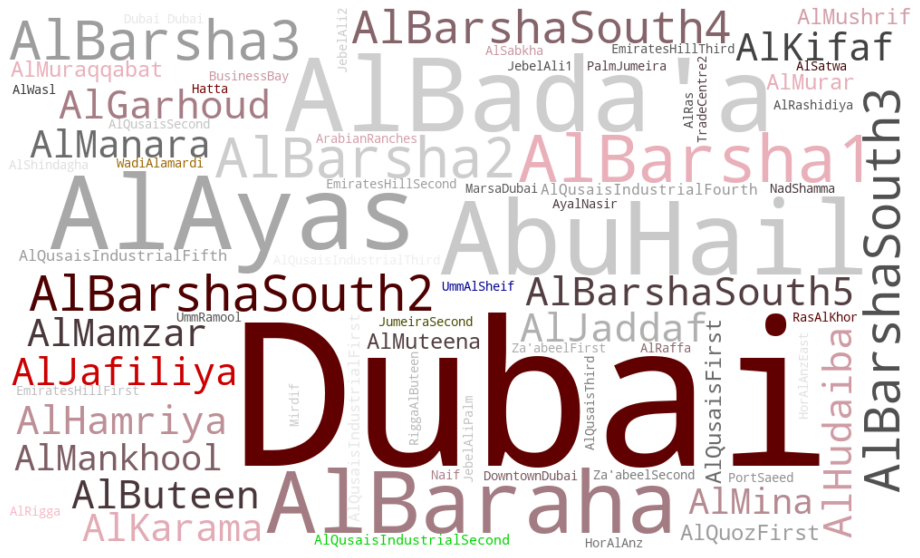

In [100]:

class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words = 500).generate(word_string)

color_to_words = {
    # words below will be colored with a green single color function
    '#FF0000': c0_list,
    # will be colored with a red single color function
    'black': c1_list,
    'blue': c2_list,
    '#00ff00': c3_list,
    'yellow': c4_list,
    'pink': c5_list,
    'orange': c6_list
}

default_color = 'grey'

print('Word cloud created!')

fig = plt.figure()
fig.set_figwidth(500)
fig.set_figheight(10)

grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wordcloud.recolor(color_func=grouped_color_func)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()